In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [6]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')
df_svm_16q_c111 = pd.read_csv('../ML_results/SVM/svm_16q_HSR_c111.csv')

df_knn_4q=pd.read_csv('../ML_results/KNN/knn_4q_v2.csv')
df_knn_8q=pd.read_csv('../ML_results/KNN/knn_8q_v2.csv')
df_knn_16q_c111 = pd.read_csv('../ML_results/KNN/knn_16q_HSR_c111.csv')

In [7]:
df_svm_8q.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,8,1111,Hardware,111,Hardware,111,0,linear,0,0.938889,0.895833,0.944444,0.930556,0.930556,0.930556
1,8,1111,Hardware,111,Simulation,111,0,linear,0,0.250000,NaN,NaN,NaN,NaN,NaN
2,8,1111,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.195833,NaN,NaN,NaN,NaN,NaN
3,8,1111,Hardware,111,Sim and Refreshed,111,0,linear,0,0.222917,NaN,NaN,NaN,NaN,NaN
4,8,1111,Simulation,111,Simulation,111,0,linear,0,0.958333,0.927083,0.885417,0.973958,0.932292,0.927083


In [61]:
df_svm_4q = df_svm_4q[df_svm_4q['machines'] == 1111]
df_svm_8q = df_svm_8q[df_svm_8q['machines'] == 1111]

df_knn_4q = df_knn_4q[df_knn_4q['machines'] == 1111]
df_knn_8q = df_knn_8q[df_knn_8q['machines'] == 1111]

df_svm_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_8q,False)

df_knn_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_knn_4q,False)
df_knn_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_knn_8q,False)

df_svm_4q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_8q,False)
df_svm_16q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_16q_c111,False)

df_knn_4q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_4q,False)
df_knn_8q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_8q,False)
df_knn_16q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_16q_c111,False)

df_svm_4q_hsr_c111 = df_svm_4q_hsr[df_svm_4q_hsr['tr&v circuits'] == 111]
df_svm_8q_hsr_c111 = df_svm_8q_hsr[df_svm_8q_hsr['tr&v circuits'] == 111]

df_knn_4q_hsr_c111 = df_knn_4q_hsr[df_knn_4q_hsr['tr&v circuits'] == 111]
df_knn_8q_hsr_c111 = df_knn_8q_hsr[df_knn_8q_hsr['tr&v circuits'] == 111]

df_knn_4q_HSR = pd.concat([df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_knn_8q_HSR = pd.concat([df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_knn_16q_HSR = pd.concat([df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Hardware'],df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Simulation'], df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)

df_svm_4q_HSR = pd.concat([df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_svm_8q_HSR = pd.concat([df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_svm_16q_HSR = pd.concat([df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Hardware'],df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Simulation'], df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)

In [39]:
df_knn_4q_HSR.head(20)

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,n_neighbors,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1111,Hardware,111,Hardware,111,0,5,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,4,1111,Hardware,111,Hardware,111,0,5,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,4,1111,Hardware,111,Hardware,111,0,5,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,1111,Hardware,111,Hardware,111,0,5,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,4,1111,Hardware,111,Hardware,111,0,5,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,4,1111,Simulation,111,Simulation,111,0,5,0,0.933333,0.953125,0.911458,0.911458,0.937500,0.932292
6,4,1111,Simulation,111,Simulation,111,0,5,1,0.958333,0.968750,0.927083,0.942708,0.947917,0.942708
7,4,1111,Simulation,111,Simulation,111,0,5,2,0.958333,0.968750,0.927083,0.942708,0.947917,0.942708
8,4,1111,Simulation,111,Simulation,111,0,5,3,0.958333,0.968750,0.927083,0.942708,0.947917,0.942708
9,4,1111,Simulation,111,Simulation,111,0,5,4,0.958333,0.968750,0.927083,0.942708,0.947917,0.942708


In [26]:
df_knn_16q_hsr.head(20)

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,n_neighbors,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,16,1111,Hardware,111,Hardware,111,0,5,0,1.0,1.0,1.0,1.0,1.0,1.0
4,16,1111,Simulation,111,Simulation,111,0,5,0,1.0,1.0,1.0,1.0,1.0,1.0
7,16,1111,Refreshed_Simulation,111,Refreshed_Simulation,111,0,5,0,1.0,1.0,1.0,1.0,1.0,1.0
10,16,1111,Sim and Refreshed,111,Sim and Refreshed,111,0,5,0,1.0,1.0,1.0,1.0,1.0,1.0
12,16,1111,Hardware,111,Hardware,111,0,5,1,1.0,1.0,1.0,1.0,1.0,1.0
16,16,1111,Simulation,111,Simulation,111,0,5,1,1.0,1.0,1.0,1.0,1.0,1.0
19,16,1111,Refreshed_Simulation,111,Refreshed_Simulation,111,0,5,1,1.0,1.0,1.0,1.0,1.0,1.0
22,16,1111,Sim and Refreshed,111,Sim and Refreshed,111,0,5,1,1.0,1.0,1.0,1.0,1.0,1.0
24,16,1111,Hardware,111,Hardware,111,0,5,2,1.0,1.0,1.0,1.0,1.0,1.0
28,16,1111,Simulation,111,Simulation,111,0,5,2,1.0,1.0,1.0,1.0,1.0,1.0


In [68]:
df_knn_full = pd.concat([df_knn_4q_HSR,df_knn_8q_HSR,df_knn_16q_HSR], ignore_index=True)
df_svm_full = pd.concat([df_svm_4q_HSR,df_svm_8q_HSR,df_svm_16q_HSR], ignore_index=True)

In [36]:
df_knn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nr_qubits            45 non-null     int64  
 1   machines             45 non-null     int64  
 2   tr&v exp_type        45 non-null     object 
 3   tr&v circuits        45 non-null     int64  
 4   test exp_type        45 non-null     object 
 5   test circuits        45 non-null     int64  
 6   preprocess settings  45 non-null     int64  
 7   n_neighbors          45 non-null     int64  
 8   param settings       45 non-null     int64  
 9   accuracy             45 non-null     float64
 10  cv_1                 45 non-null     float64
 11  cv_2                 45 non-null     float64
 12  cv_3                 45 non-null     float64
 13  cv_4                 45 non-null     float64
 14  cv_5                 45 non-null     float64
dtypes: float64(6), int64(7), object(2)
memory 

In [45]:
df_knn_4q_HSR['accuracy'] = df_knn_4q_HSR['accuracy'] *100


In [56]:
df_knn_8q_HSR['accuracy'] = df_knn_8q_HSR['accuracy'] *100
df_knn_16q_HSR['accuracy'] = df_knn_16q_HSR['accuracy'] *100

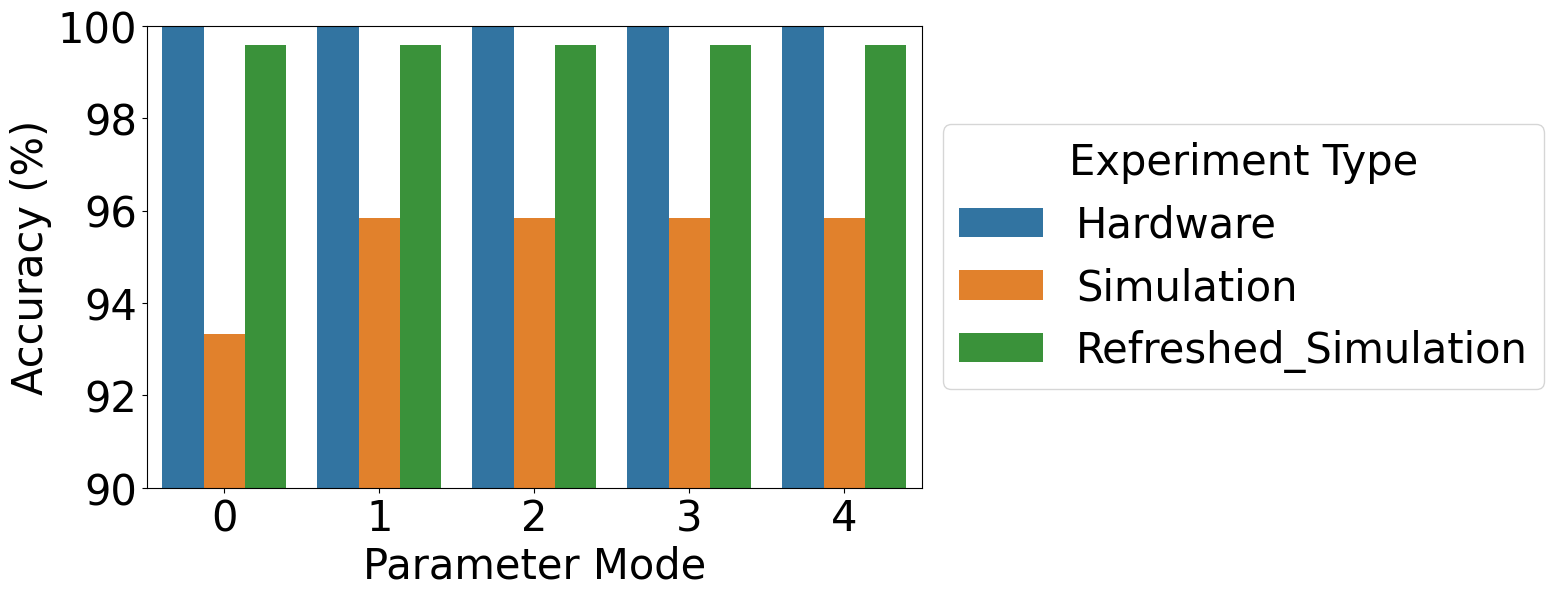

In [59]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_knn_4q_HSR,
    x = 'param settings',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([90,100]))
# plt.title('ML Model Accuracy vs Size of Algorithm')
plt.xlabel('Parameter Mode', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()

In [62]:
df_svm_4q_HSR.head(20)

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1111,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1111,Hardware,111,Hardware,111,0,poly,1,1.000000,1.000000,0.990291,1.000000,1.000000,1.000000
2,4,1111,Hardware,111,Hardware,111,0,rbf,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,1111,Hardware,111,Hardware,111,0,poly,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,4,1111,Hardware,111,Hardware,111,0,poly,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,4,1111,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833
6,4,1111,Simulation,111,Simulation,111,0,poly,1,0.891667,0.906250,0.885417,0.833333,0.875000,0.838542
7,4,1111,Simulation,111,Simulation,111,0,rbf,2,0.995833,0.994792,0.979167,0.984375,0.989583,0.979167
8,4,1111,Simulation,111,Simulation,111,0,poly,3,0.995833,0.989583,0.984375,0.979167,0.994792,0.973958
9,4,1111,Simulation,111,Simulation,111,0,poly,4,0.995833,0.984375,0.984375,0.953125,0.989583,0.958333


In [63]:
df_svm_4q_HSR['accuracy'] = df_svm_4q_HSR['accuracy'] *100
df_svm_8q_HSR['accuracy'] = df_svm_8q_HSR['accuracy'] *100
df_svm_16q_HSR['accuracy'] = df_svm_16q_HSR['accuracy'] *100


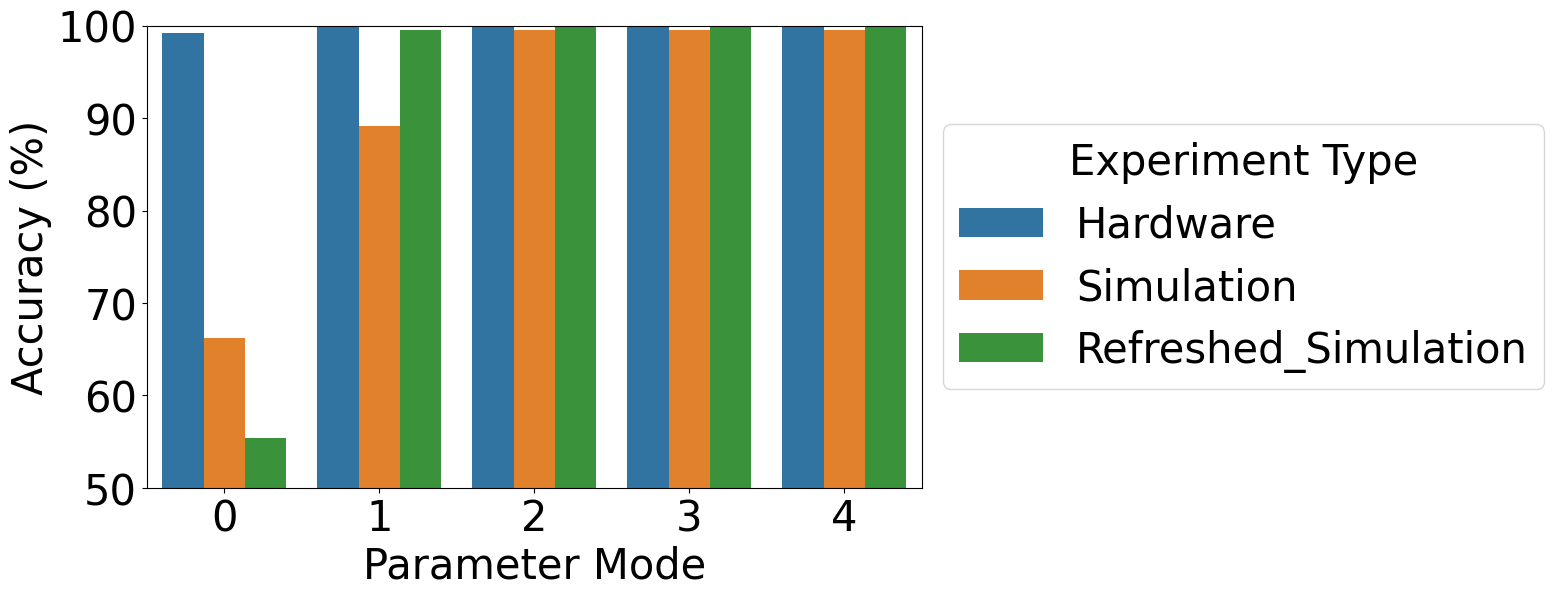

In [67]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_svm_4q_HSR,
    x = 'param settings',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([50,100]))
# plt.title('ML Model Accuracy vs Size of Algorithm')
plt.xlabel('Parameter Mode', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()

In [71]:
df_knn_full = pd.concat([df_knn_full[df_knn_full['param settings'] == 4]], ignore_index=True)
df_knn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nr_qubits            9 non-null      int64  
 1   machines             9 non-null      int64  
 2   tr&v exp_type        9 non-null      object 
 3   tr&v circuits        9 non-null      int64  
 4   test exp_type        9 non-null      object 
 5   test circuits        9 non-null      int64  
 6   preprocess settings  9 non-null      int64  
 7   n_neighbors          9 non-null      int64  
 8   param settings       9 non-null      int64  
 9   accuracy             9 non-null      float64
 10  cv_1                 9 non-null      float64
 11  cv_2                 9 non-null      float64
 12  cv_3                 9 non-null      float64
 13  cv_4                 9 non-null      float64
 14  cv_5                 9 non-null      float64
dtypes: float64(6), int64(7), object(2)
memory us

In [70]:
df_knn_full.head(10)

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,n_neighbors,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
4,4,1111,Hardware,111,Hardware,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
9,4,1111,Simulation,111,Simulation,111,0,5,4,0.958333,0.96875,0.927083,0.942708,0.947917,0.942708
14,4,1111,Refreshed_Simulation,111,Refreshed_Simulation,111,0,5,4,0.995833,1.00000,1.000000,0.994792,1.000000,1.000000
19,8,1111,Hardware,111,Hardware,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
24,8,1111,Simulation,111,Simulation,111,0,5,4,0.991667,1.00000,1.000000,1.000000,1.000000,1.000000
29,8,1111,Refreshed_Simulation,111,Refreshed_Simulation,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
34,16,1111,Hardware,111,Hardware,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
39,16,1111,Simulation,111,Simulation,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
44,16,1111,Refreshed_Simulation,111,Refreshed_Simulation,111,0,5,4,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [73]:
df_knn_full['accuracy'] = df_knn_full['accuracy'] * 100
df_svm_full['accuracy'] = df_svm_full['accuracy'] * 100

In [72]:
df_svm_full = pd.concat([df_svm_full[df_svm_full['param settings'] == 4]], ignore_index=True)
df_svm_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nr_qubits            9 non-null      int64  
 1   machines             9 non-null      int64  
 2   tr&v exp_type        9 non-null      object 
 3   tr&v circuits        9 non-null      int64  
 4   test exp_type        9 non-null      object 
 5   test circuits        9 non-null      int64  
 6   preprocess settings  9 non-null      int64  
 7   kernal               9 non-null      object 
 8   param settings       9 non-null      int64  
 9   accuracy             9 non-null      float64
 10  cv_1                 9 non-null      float64
 11  cv_2                 9 non-null      float64
 12  cv_3                 9 non-null      float64
 13  cv_4                 9 non-null      float64
 14  cv_5                 9 non-null      float64
dtypes: float64(6), int64(6), object(3)
memory us

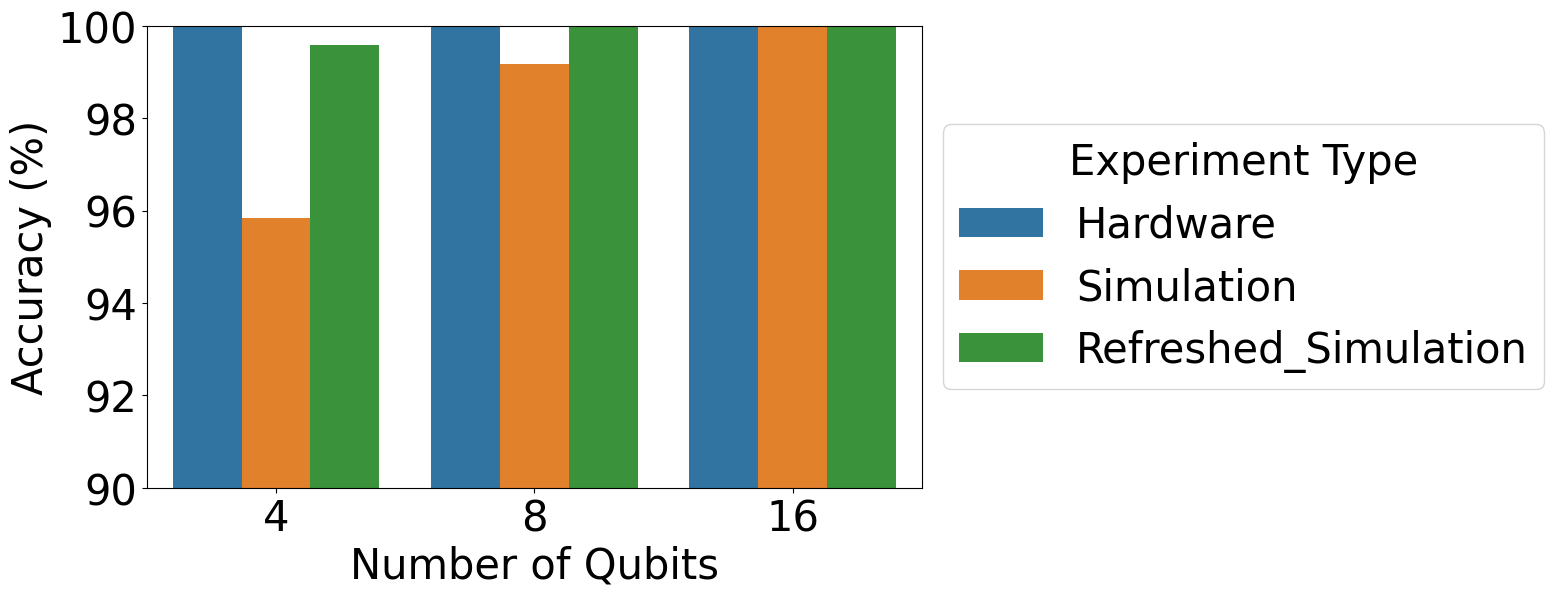

In [75]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_knn_full,
    x = 'nr_qubits',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([90,100]))
# plt.title('ML Model Accuracy vs Size of Algorithm')
plt.xlabel('Number of Qubits', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()

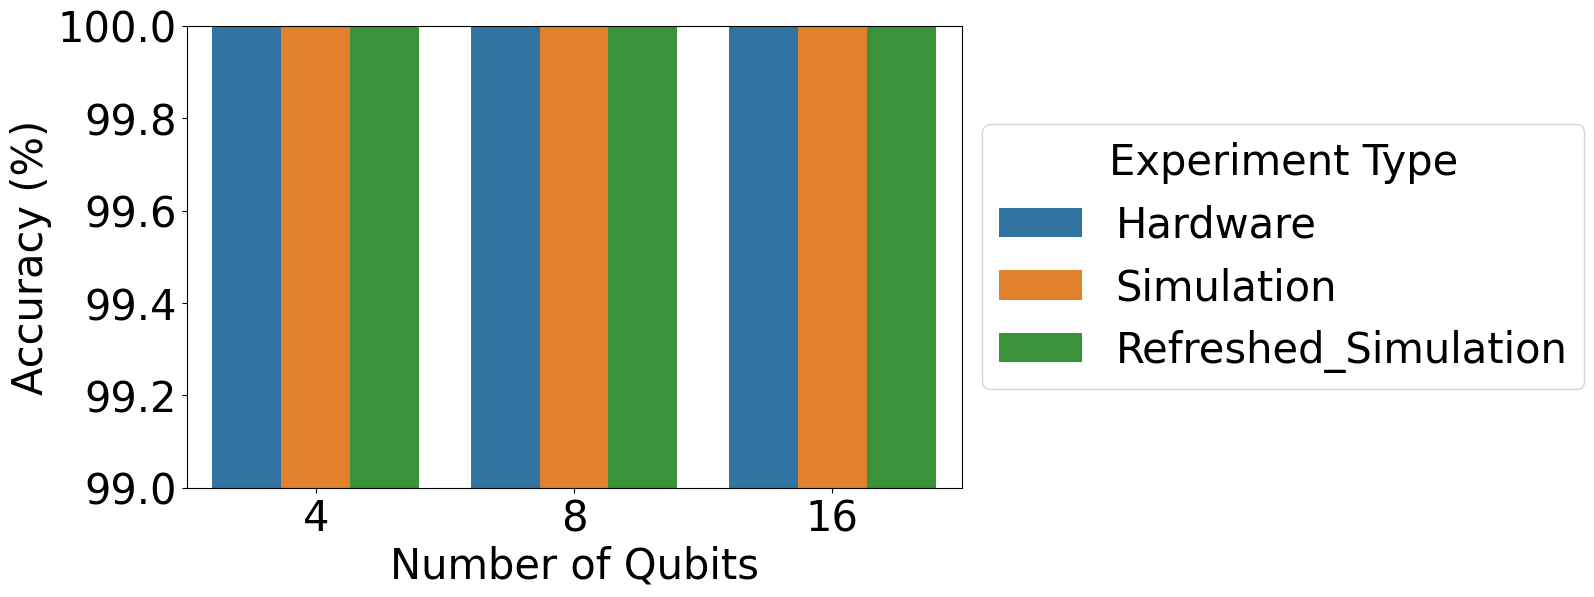

In [78]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_svm_full,
    x = 'nr_qubits',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([99,100]))
# plt.title('ML Model Accuracy vs Size of Algorithm')
plt.xlabel('Number of Qubits', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()